In [1]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [1]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [14]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2 --cache ram

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
hint: core.useBuiltinFSMonitor will be deprecated soon; use core.fsmonitor instead
hint: Disable this message with "git config advice.useCoreFSMonitorConfig false"
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'D:\RIJAL\Kuliah\smt': No such file or directory
YOLOv5  2022-12-8 Python-3.10.8 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight

In [15]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ASUS/.cache\torch\hub\master.zip
YOLOv5  2022-12-8 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [16]:
import os
img = os.path.join('./data/images/awake.26cf7813-6f83-11ed-a073-ac05f5a81f7c.jpg')

In [17]:
results = model(img)

In [18]:
results.print()

image 1/1: 480x640 1 awake
Speed: 13.0ms pre-process, 68.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


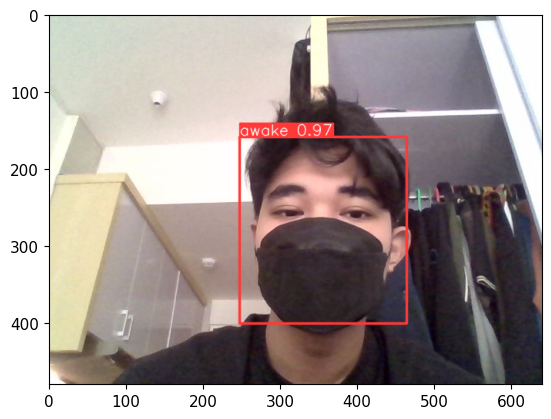

In [19]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 480x640 1 drowsy
Speed: 18.2ms pre-process, 63.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


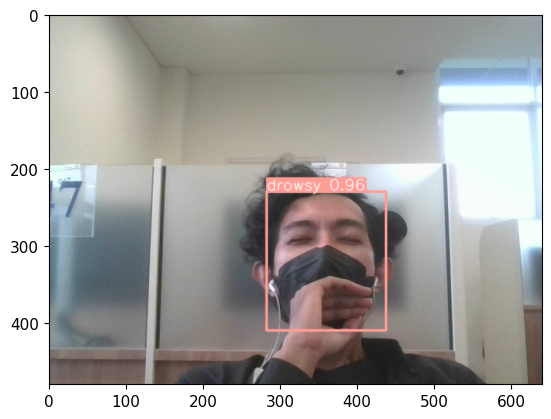

In [20]:
img2 = os.path.join('./data/images/drowsy.6c5d232e-6bb2-11ed-b017-fc4482a2ef62.jpg')
results = model(img2)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 480x640 1 awake
Speed: 4.0ms pre-process, 77.8ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


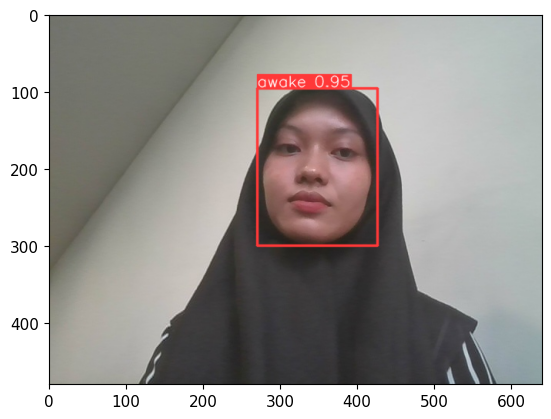

In [21]:
img3 = os.path.join('./data/images/awake.61a5ffef-6f99-11ed-b97d-fc4482a2ef62.jpg')
results = model(img3)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 480x640 1 drowsy
Speed: 21.9ms pre-process, 69.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


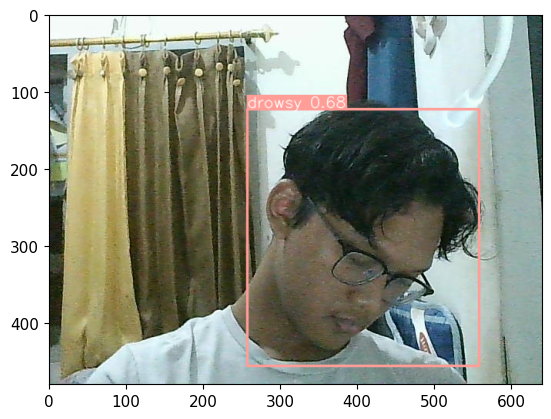

In [22]:
img4 = os.path.join('./data/images/drowsy.0bc4fba4-69a7-11ed-b628-7c10c985ec77.jpg')
results = model(img4)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 335x670 1 drowsy
Speed: 188.5ms pre-process, 57.3ms inference, 1.0ms NMS per image at shape (1, 3, 320, 640)


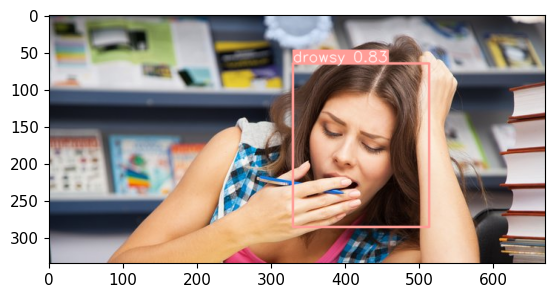

In [24]:
img5 = 'https://cdns.klimg.com/merdeka.com/i/w/news/2020/12/17/1254310/670x335/sama-sama-buat-tubuh-lemas-ini-cara-bedakan-mengantuk-dan-kelelahan.jpg'
results = model(img5)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
cap = cv2.VideoCapture('vidkantuk.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'